In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [7]:
def count_classes(directory):
    class_names = []
    files_count = []

    # Überprüfe, ob das übergebene Verzeichnis existiert
    if not os.path.isdir(directory):
        print("Das angegebene Verzeichnis existiert nicht.")
        return None

    # Durchlaufe die Unterverzeichnisse im übergebenen Verzeichnis
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        # Überprüfe, ob es sich um ein Verzeichnis handelt
        if os.path.isdir(subdir_path):
            class_names.append(subdir)  # Füge den Klassennamen hinzu
            files_count.append(len(os.listdir(subdir_path)))  # Zähle die Dateien in der Klasse und füge die Anzahl hinzu

    return class_names, files_count

class_names, files_count = count_classes("Set_12_05_24\\train")

print("Klassen und Dateien:")
for class_name, file_count in zip(class_names, files_count):
    print(f"- {class_name}: {file_count} Dateien")

Klassen und Dateien:
- Basilikum: 487 Dateien
- Petersilie: 418 Dateien


In [14]:
import random
import shutil


#create test set
def create_test(test_split=0.1):
    if os.path.isdir("Set_12_05_24\\test"):
        print("Test directory already created!")
        print("Process Terminated")
        return
    os.mkdir("Set_12_05_24\\test")
    for f in os.listdir("Set_12_05_24\\train"):
        train_class_path = os.path.join("Set_12_05_24\\train", f)
        if os.path.isdir(train_class_path):
            test_class_path = os.path.join("Set_12_05_24\\test", f)
            os.mkdir(test_class_path)
            files_to_move= int(0.1*len(os.listdir(train_class_path)))
            
            for i in range(files_to_move):
                random_image = os.path.join(train_class_path, random.choice(os.listdir(train_class_path)))
                shutil.move(random_image, test_class_path)
    print("Validation set created successfully using {:.1%} of training data".format(test_split))
    

#create validation set
def create_validation(validation_split=0.2):
    if os.path.isdir("Set_12_05_24\\validation"):
        print("Validation directory already created!")
        print("Process Terminated")
        return
    os.mkdir("Set_12_05_24\\validation")
    for f in os.listdir("Set_12_05_24\\train"):
        train_class_path = os.path.join("Set_12_05_24\\train", f)
        if os.path.isdir(train_class_path):
            validation_class_path = os.path.join("Set_12_05_24\\validation", f)
            os.mkdir(validation_class_path)
            files_to_move= int(0.2*len(os.listdir(train_class_path)))
            
            for i in range(files_to_move):
                random_image = os.path.join(train_class_path, random.choice(os.listdir(train_class_path)))
                shutil.move(random_image, validation_class_path)
    print("Validation set created successfully using {:.2%} of training data".format(validation_split))


create_test()
create_validation()

Test directory already created!
Process Terminated
Validation set created successfully using 20.00% of training data


In [20]:
# Zusammenfassung des Datensatzes

print("Trainingsdaten:")
train_classes, train_count = count_classes("Set_12_05_24\\train")
print(train_classes)
print(train_count)

print("\nValidierungsdaten:")
validation_classes, validation_count = count_classes("Set_12_05_24\\validation")
print(validation_classes)
print(validation_count)

print("\nTestdaten:")
test_classes, test_count = count_classes("Set_12_05_24\\test")
print(test_classes)
print(test_count)

Trainingsdaten:
['Basilikum', 'Petersilie']
[352, 302]

Validierungsdaten:
['Basilikum', 'Petersilie']
[87, 75]

Testdaten:
['Basilikum', 'Petersilie']
[48, 41]


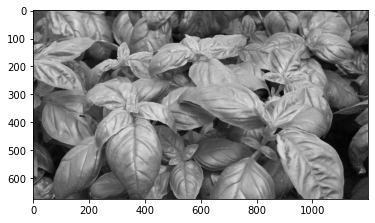

In [21]:
CATEGORIES = ["Basilikum", "Petersilie"]

for category in CATEGORIES:
  path = os.path.join("Set_12_05_24\\train", category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

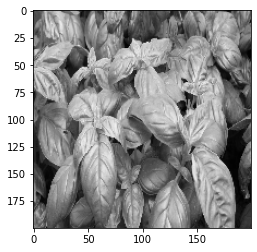

In [22]:
# Resize images

IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

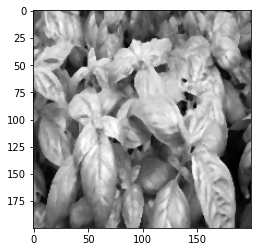

In [23]:
# Filterung durch Median blurr

filtered = cv2.medianBlur(new_array, 3)
plt.imshow(filtered, cmap = 'gray')
plt.show()

In [29]:
training_data = []
validation_data = []


def create_data(choose_data):
    for category in CATEGORIES:
        path = os.path.join(f"Set_12_05_24\\{choose_data}", category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                filtered_array = cv2.medianBlur(resized_array, 3)
                if choose_data == "train":
                    training_data.append([filtered_array, class_num])
                elif choose_data == "validation":
                    validation_data.append([filtered_array, class_num])
            except Exception as e:
                pass
    
    print(f"{choose_data} data erfolgreich erstellt!")
            
        
create_data(choose_data="train")
create_data(choose_data="validation")

train data erfolgreich erstellt!
validation data erfolgreich erstellt!


In [37]:
random.shuffle(training_data)
random.shuffle(validation_data)

In [40]:
train_features = []
train_labels = []
validation_features = []
validation_labels = []

for features, labels in training_data:
    train_features.append(features)
    train_labels.append(labels)
    
for features, labels in validation_data:
    validation_features.append(features)
    validation_labels.append(labels)

In [42]:
train_features = np.array(train_features).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # 1 = grau und -1 = menge an daten in X automatisch berechnen
train_labels = np.array(train_labels)

validation_features = np.array(validation_features).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # 1 = grau und -1 = menge an daten in X automatisch berechnen
validation_labels = np.array(validation_labels)

In [43]:
import pickle

pickle_out = open("train_features.pickle", "wb")
pickle.dump(train_features, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle", "wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

pickle_out = open("validation_features.pickle", "wb")
pickle.dump(validation_features, pickle_out)
pickle_out.close()

pickle_out = open("validation_labels.pickle", "wb")
pickle.dump(validation_labels, pickle_out)
pickle_out.close()